In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

/home/jiashen/env3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
train = pd.read_csv('train_c.csv')
test = pd.read_csv('test_c.csv')

In [21]:
nn_train = pd.read_csv('keras_mlp_4_features_train.csv')
nn_test = pd.read_csv('keras_mlp_4_features_test.csv')

In [22]:
train = train.merge(nn_train,how='left',on='id')
test = test.merge(nn_test,how='left',on='id')

## Fit the model with nn feature

In [24]:
col = list(test.columns)[2:]

In [25]:
label = train['price_doc']*0.95+10

In [26]:
dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

In [27]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

[0]	train-rmse:7.79246e+06	test-rmse:7.79631e+06
[50]	train-rmse:2.30859e+06	test-rmse:2.68117e+06
[100]	train-rmse:2.02459e+06	test-rmse:2.54286e+06
[150]	train-rmse:1.91794e+06	test-rmse:2.51338e+06
[200]	train-rmse:1.83543e+06	test-rmse:2.49993e+06
[250]	train-rmse:1.76469e+06	test-rmse:2.48923e+06
[300]	train-rmse:1.70654e+06	test-rmse:2.48206e+06
[350]	train-rmse:1.65539e+06	test-rmse:2.47699e+06
Performance does not improve from 371 rounds


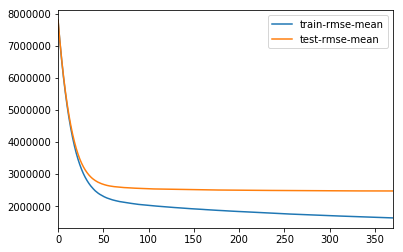

In [28]:
xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [29]:
model = xgb.train(params,dtrain,num_boost_round=len(xgb_cvalid))

In [30]:
def get_feature_importance(model):
    Importance = model.get_fscore()
    Importance = list(Importance.items())
    Feature= []
    Score = []
    for each in Importance:
        Feature.append(each[0])
        Score.append(each[1])
    df = pd.DataFrame({'Feature':Feature,'Score':Score}).sort_values(by=['Score'],ascending=[0])
    return df    

In [31]:
def plot_importance(model):
    FImportance = get_feature_importance(model).iloc[0:50,]
    plt.figure()
    FImportance.plot(kind='barh', x='Feature', y='Score', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.show()

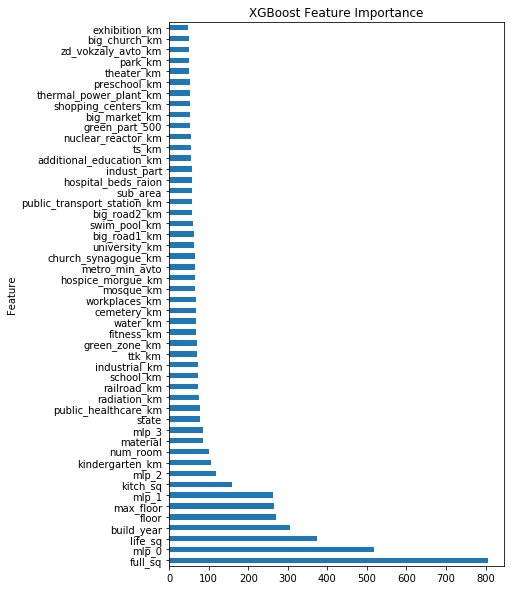

In [32]:
plot_importance(model)

In [34]:
pred = model.predict(dtest)

In [35]:
sub = pd.DataFrame({'id':test['id'],'price_doc':pred})

In [37]:
cc = pd.read_csv('sub.csv')

In [39]:
sub

,id,price_doc
0,30474,5.263170e+06
1,30475,4.058639e+06
2,30476,3.135123e+06
3,30477,2.246612e+06
4,30478,2.765261e+06
5,30479,6.643150e+06
6,30480,1.450602e+06
7,30481,6.636208e+06
8,30482,2.863050e+06
9,30483,3.656460e+06
